## Dataset Overview
Loan Approval Prediction

- Description: Build a machine learning model that can classify loan applications as either "Approved" or "Rejected".
- Columns: Includes applicant’s demographics, credit history, income, loan amount, and other relevant features.
- Purpose: Used for approval or rejection of loan.
- Analysis Tasks: EDA, data preprocessing, ML model building, evaluation, and model deployment.

## Step 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
%matplotlib inline

## Step 2: Loading Dataset

In [2]:
data = pd.read_csv("loan prediction.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

## Step 3: Data Preprocessing 

In [66]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [68]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

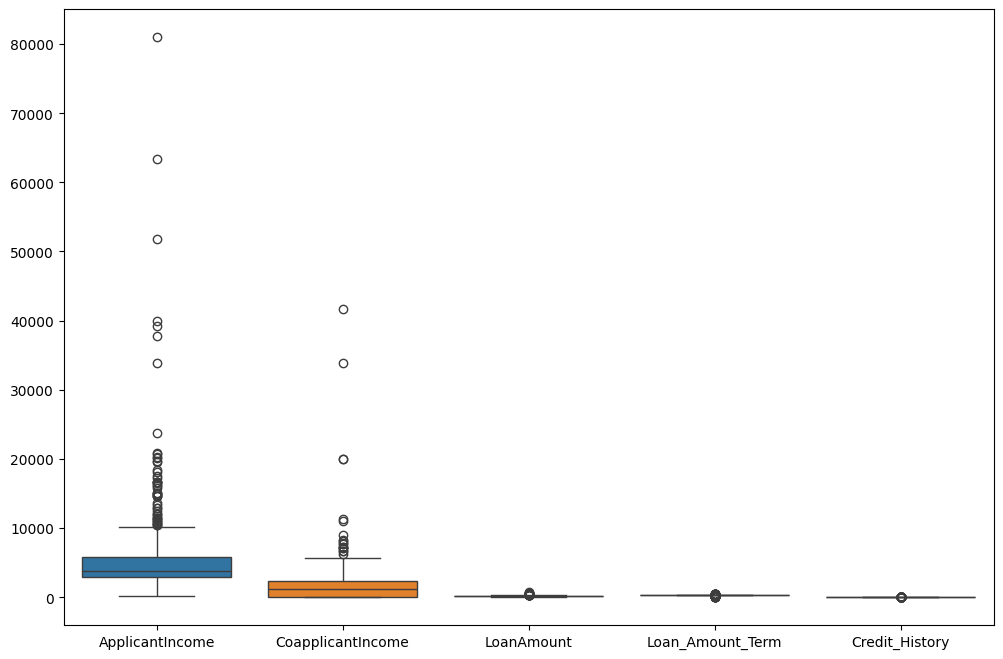

In [69]:
#outlier detection
plt.figure(figsize=(12,8))
sns.boxplot(data=data )

In [70]:
#Filling null values of numerical datatype
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].median()) 
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())  #it has no outlier so fill it with mean
data["Credit_History"].fillna(data["Credit_History"].mode()[0],inplace=True)

In [71]:
#Fill null values of object datatype
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [72]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Step 4: Exploratory Data Analysis


##### Gender Distribution

Number of people who took loan by gender
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

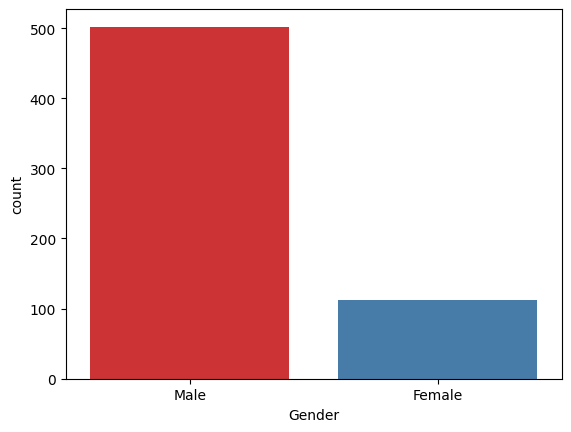

In [73]:
print('Number of people who took loan by gender')
print(data['Gender'].value_counts())
sns.countplot(x='Gender', data=data, palette='Set1')

The gender difference is very much here. Data shows people who took loan are 502 male and only 112 female.

##### Marital Status

Number of people who took loan by Marital Status
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

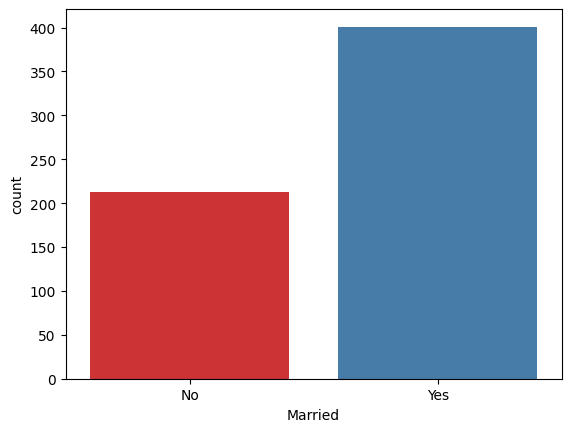

In [74]:
#No of people who took loan based on Marital Status
print('Number of people who took loan by Marital Status')
print(data['Married'].value_counts())
sns.countplot(x='Married', data=data, palette='Set1')


This shows that married people have taken double the loan taken by single people.

##### Education Status

Number of people who took loan by Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

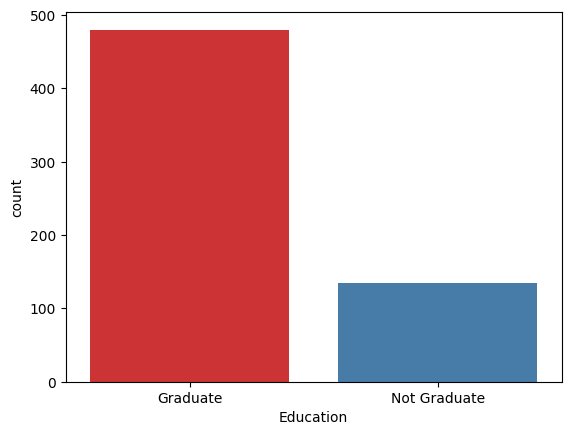

In [75]:
print('Number of people who took loan by Education')
print(data['Education'].value_counts())
sns.countplot(x='Education', data=data, palette='Set1')


The dataset shows that graduates are taking loan more as compared to non-graduates. 

##### Employement Status

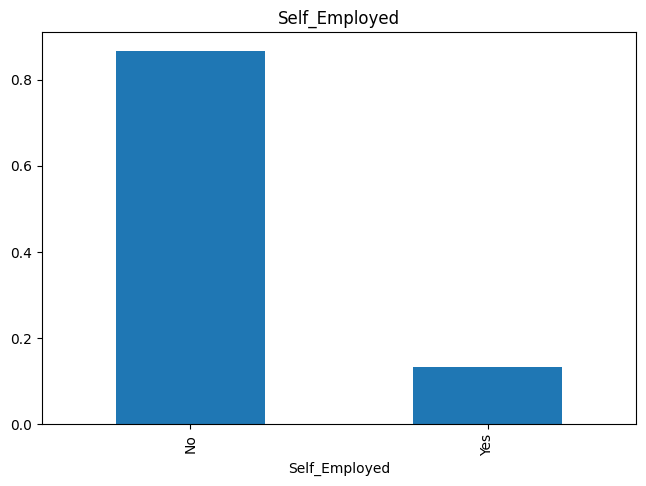

In [76]:
plt.subplot()
data.Self_Employed.value_counts(normalize=True).plot(kind = 'bar',title = "Self_Employed")
plt.tight_layout(pad=0.5)

This shows nearly 85% loan applicants are self-employed.

##### Loan Approval Rate

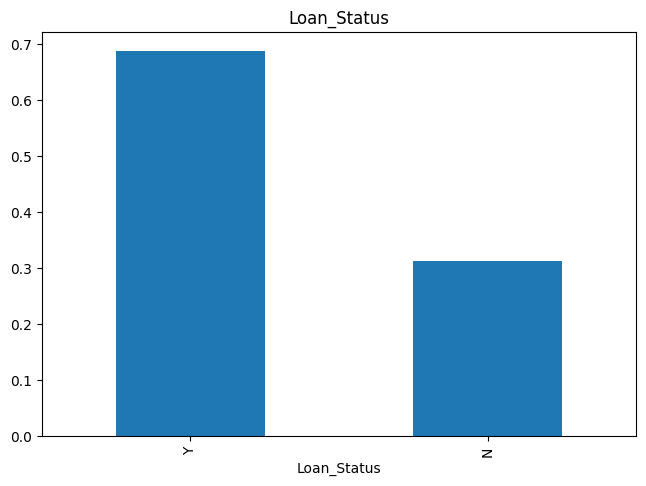

In [77]:
plt.subplot()
data.Loan_Status.value_counts(normalize=True).plot(kind = 'bar',title = "Loan_Status")
plt.tight_layout(pad=0.5)

Data shows that the loan has been approved for more than 65% of applicants.

##### Property Area

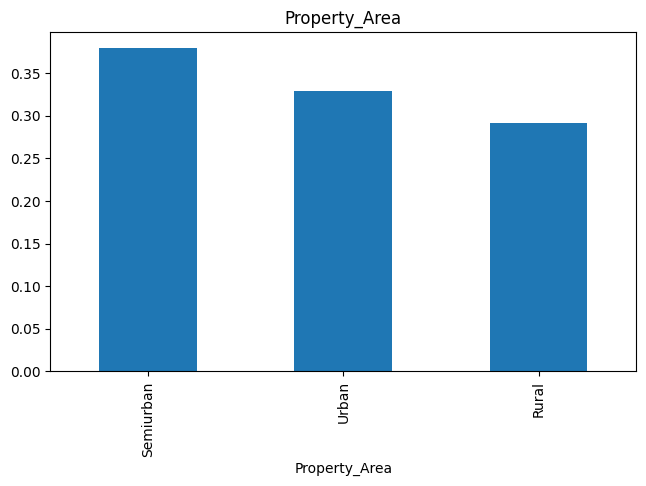

In [78]:
plt.subplot()
data.Property_Area.value_counts(normalize=True).plot(kind = 'bar',title = "Property_Area")
plt.tight_layout(pad=0.5)

This shows most applicants are from Semiurban area, second number is Urban and the least are from Rural area.

##### Dependents

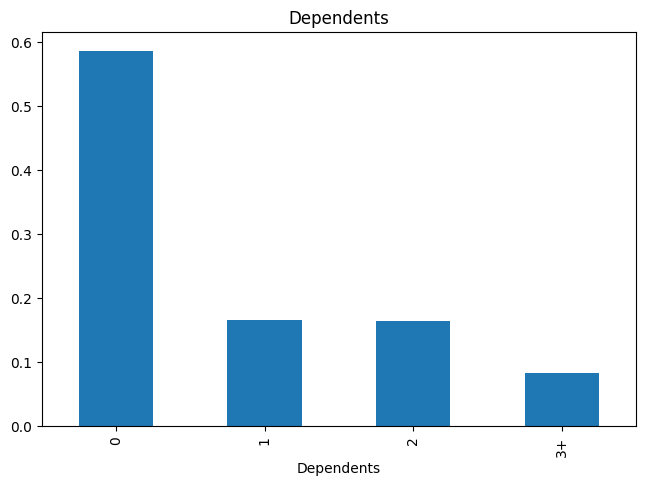

In [79]:
plt.subplot()
data.Dependents.value_counts(normalize = True).plot(kind='bar',title="Dependents")
plt.tight_layout(pad=0.5)

It shows that nearly 60% applicants have no dependents. While almost 18% applicants have 1 and 2 dependents each followed by the applicants with 3+ applicants.

##### Loan Amount Term

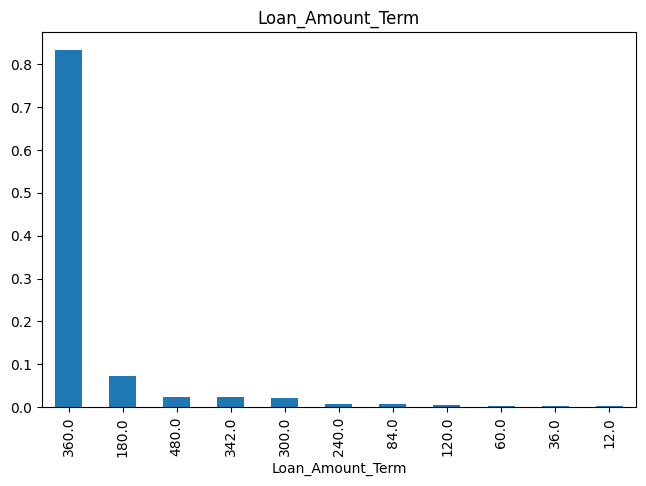

In [80]:
plt.subplot()
data.Loan_Amount_Term.value_counts(normalize = 'True').plot(kind = 'bar', title='Loan_Amount_Term')
plt.tight_layout(pad=0.5)

This shows more than 80% loans were taken for 360 months.

##### Credit History

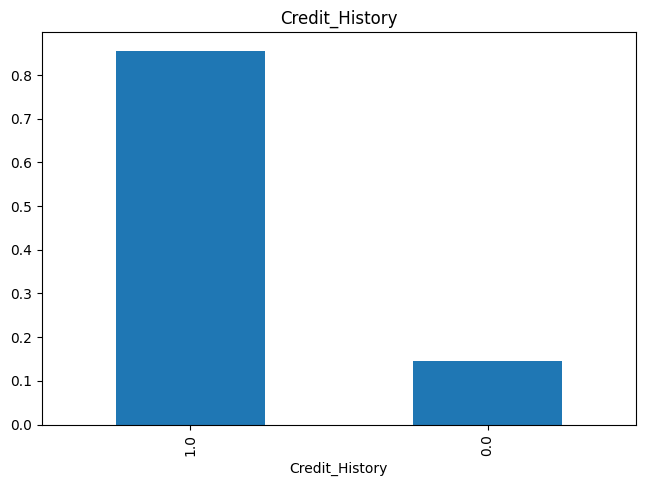

In [81]:
plt.subplot()
data.Credit_History.value_counts(normalize = 'True').plot(kind = 'bar', title='Credit_History')
plt.tight_layout(pad=0.5)

This shows most of the applicants have Credit history 1 which means they have taken loan before.

## Step 5: Feature Engineering

##### Correlation

<Axes: >

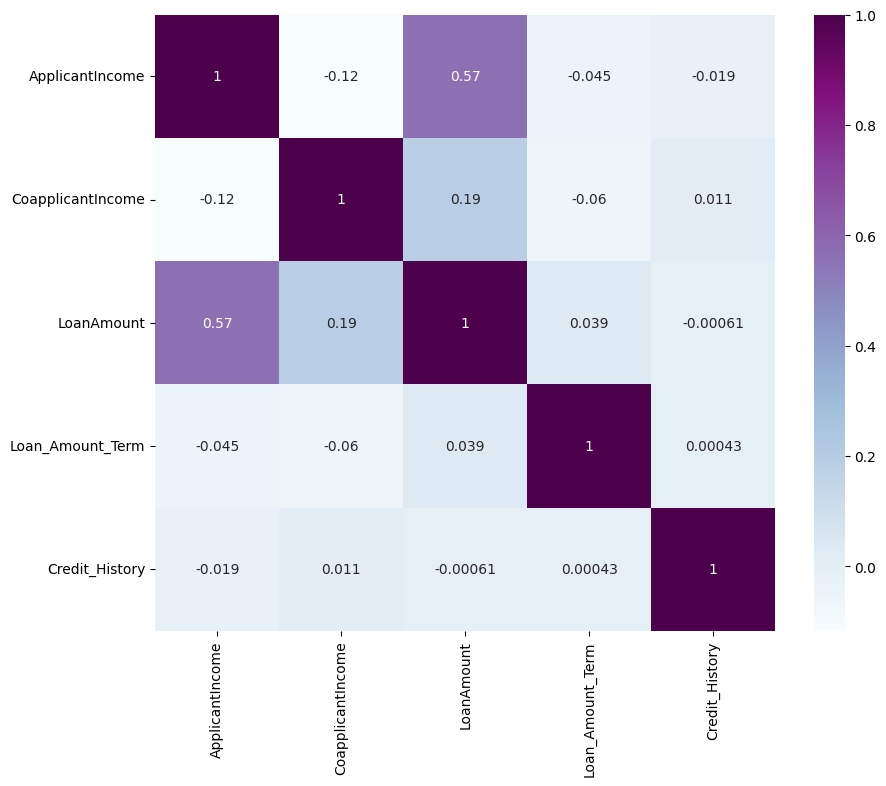

In [82]:
#Correlation
corr = data.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True, cmap='BuPu')

In [83]:
corr = data.corr(numeric_only=True)
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.045242,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059675,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.039235,-0.000607
Loan_Amount_Term,-0.045242,-0.059675,0.039235,1.000000,0.000432
Credit_History,-0.018615,0.011134,-0.000607,0.000432,1.000000


#### Insights from Correlation Metrix: 
- Their is a moderately strong positive correlation between Applicant Income and Loan Amount indicating that as the applicant's income increases, the loan amount tends to increase.
- Between Applicant Income and Coapplicant Income, there is weak negative correlation. 
- The correlation between CoapplicantIncome and LoanAmount is weak positive.
- There is almost no correlation in between LoanAmount and Loan_Amount_Term, Credit history and loan amount, and Credit_History and Loan_Amount_Term.

In [84]:
#Total Applicant Income
data['Total_Income']= data['ApplicantIncome'] + data['CoapplicantIncome']
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


Here we have combined ApplicantIncome and CoapplicantIncome, making a new feature Total_Income. 

##### Applying Log Transformation
To reduce skewness, handle outliers, stabilize variance, and improve the fit and interpretability of machine learning models by making the data distribution more normal-like. This is especially important when dealing with income, which tends to have a wide range and skewed distribution.

<Axes: xlabel='ApplicantIncomelog', ylabel='Density'>

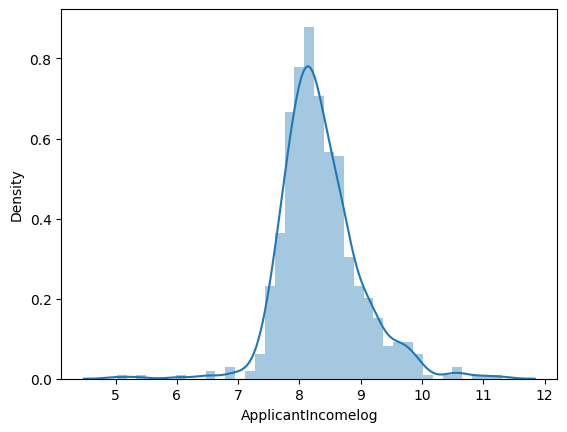

In [85]:
#Apply Log Transformation on Applicant Income

data['ApplicantIncomelog']= np.log(data['ApplicantIncome']+ 1)
sns.distplot(data['ApplicantIncomelog'])

In [86]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomelog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681


<Axes: xlabel='ApplicantIncomelog', ylabel='Density'>

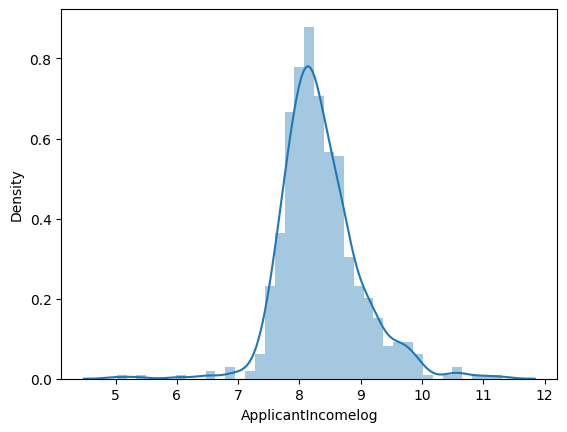

In [87]:
data['LoanAmountlog']= np.log(data['LoanAmount']+ 1)
sns.distplot(data['ApplicantIncomelog'])

<Axes: xlabel='LoanAmountTermlog', ylabel='Density'>

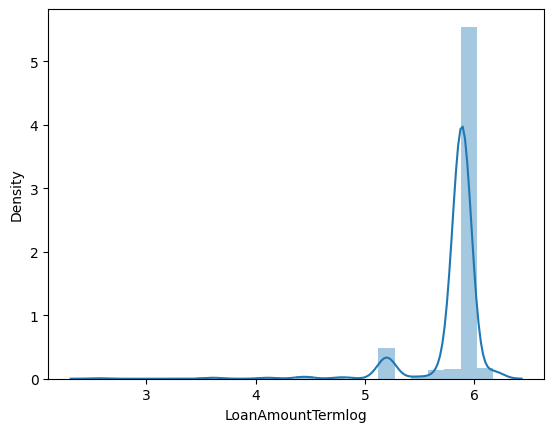

In [88]:
data['LoanAmountTermlog']= np.log(data['Loan_Amount_Term']+ 1)
sns.distplot(data['LoanAmountTermlog'])

<Axes: xlabel='TotalIncomelog', ylabel='Density'>

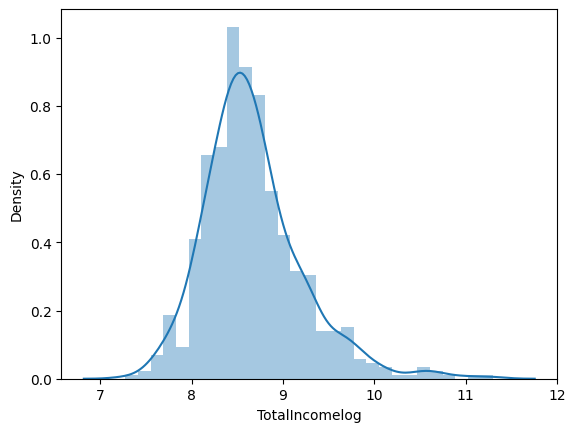

In [89]:
data['TotalIncomelog']= np.log(data['Total_Income']+ 1)
sns.distplot(data['TotalIncomelog'])

In [90]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomelog,LoanAmountlog,LoanAmountTermlog,TotalIncomelog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.859812,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878,8.699681


In [91]:
# Drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income', 'Loan_ID']
data= data.drop(columns=cols)

In [92]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,LoanAmountTermlog,TotalIncomelog
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


In [93]:
#Encoding for changing to numerical
cols = ['Gender', 'Married', 'Education', 'Dependents', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for col in cols:
    data[col]= le.fit_transform(data[col])

In [94]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,LoanAmountTermlog,TotalIncomelog
0,1,0,0,0,0,1.0,2,1,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              614 non-null    int32  
 1   Married             614 non-null    int32  
 2   Dependents          614 non-null    int32  
 3   Education           614 non-null    int32  
 4   Self_Employed       614 non-null    int32  
 5   Credit_History      614 non-null    float64
 6   Property_Area       614 non-null    int32  
 7   Loan_Status         614 non-null    int32  
 8   ApplicantIncomelog  614 non-null    float64
 9   LoanAmountlog       614 non-null    float64
 10  LoanAmountTermlog   614 non-null    float64
 11  TotalIncomelog      614 non-null    float64
dtypes: float64(5), int32(7)
memory usage: 40.9 KB


In [96]:
# Splitting Independent and Dependent features
X = data.drop(columns=['Loan_Status'], axis=1)
y = data['Loan_Status']

In [97]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status', 'ApplicantIncomelog',
       'LoanAmountlog', 'LoanAmountTermlog', 'TotalIncomelog'],
      dtype='object')

## Step 6: Predictive Modeling- ML Algorithms
Machine Learning algorithms to use:
- Logistic Regression
- Decision Tree Classifier
- Random Forest 
- K Nearest Neighbor
- AdaBoost Classifier
- Gradient Boosting Classifier

### Importing Machine Learning Libraries

In [98]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


In [99]:
# Splitting into training and testing

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

### 1. Logistic Regression

In [100]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred_model1 = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_model1)
print("Accuracy of Logistic Regression is: ", accuracy)

Accuracy of Logistic Regression is:  0.7727272727272727


### 2. Decision Tree Classifier

In [101]:
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
y_pred_model2 = model2.predict(X_test)
accuracy = accuracy_score(y_pred_model2, y_test)
print("Accuracy Score for Decision Tree is: ", accuracy)

Accuracy Score for Decision Tree is:  0.7272727272727273


### 3. Random Forrest Classifier

In [102]:
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)
y_pred_model3 = model3.predict(X_test)
accuracy = accuracy_score(y_pred_model3,y_test)
print("Accuracy of Random Forest Model is: ", accuracy)

Accuracy of Random Forest Model is:  0.7792207792207793


### 4. KNN

In [103]:
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(X_train, y_train)
y_pred_model4 = model4.predict(X_test)
accuracy = accuracy_score(y_pred_model4,y_test)
print("Accuracy of KNearest Neighbor is: ", accuracy)

Accuracy of KNearest Neighbor is:  0.7142857142857143


#### Hyperparameter Tuning for KNN

In [104]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [5, 10, 15, 20, 25, 30],        # Different values for number of neighbors
    'leaf_size': [10, 20, 30, 40, 50],             # Values for leaf size
    'p': [1, 2],                                   # 1 for Manhattan distance, 2 for Euclidean
    'weights': ['uniform', 'distance']             # Weight options
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Print best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy achieved: ", grid_search.best_score_)

# Make predictions with the best model
model5 = grid_search.best_estimator_
y_pred_model5 = model5.predict(X_test)

# Print classification report and accuracy
print(classification_report(y_test, y_pred_model5))
print("Accuracy of the best KNN model:>", accuracy_score(y_test, y_pred_model5))


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best parameters found:  {'leaf_size': 10, 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Best accuracy achieved:  0.7521739130434784
              precision    recall  f1-score   support

           0       0.80      0.30      0.43        54
           1       0.72      0.96      0.82       100

    accuracy                           0.73       154
   macro avg       0.76      0.63      0.63       154
weighted avg       0.75      0.73      0.68       154

Accuracy of the best KNN model:> 0.7272727272727273


### Classification Report

In [105]:
def generate_classification_report(model_name, y_test, y_pred):
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for {model_name}: \n{report}\n")
    
generate_classification_report(model1, y_test, y_pred_model1)
generate_classification_report(model2, y_test, y_pred_model2)
generate_classification_report(model3, y_test, y_pred_model3)
generate_classification_report(model4, y_test, y_pred_model4)
generate_classification_report(model5, y_test, y_pred_model5)


Classification Report for LogisticRegression(): 
              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154


Classification Report for DecisionTreeClassifier(): 
              precision    recall  f1-score   support

           0       0.62      0.56      0.59        54
           1       0.77      0.82      0.80       100

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.72      0.73      0.72       154


Classification Report for RandomForestClassifier(): 
              precision    recall  f1-score   support

           0       0.86      0.44      0.59        54
           1       0.76      0.96      0.85       100

    accuracy             

##### Interpretation:
The comparison of the three models — Logistic Regression, Decision Tree, and Random Forest — shows that Logistic Regression achieved the highest accuracy at 77% and excelled in precision for predicting "Not Approved" loans, but it struggled with recall for this class, missing many actual "Not Approved" loans. On the other hand, Decision Tree and Random Forest provided a more balanced trade-off between precision and recall for both classes, though their overall accuracy was slightly lower at 72% and 71% respectively. Logistic Regression was particularly strong in identifying "Approved" loans, but Decision Tree and Random Forest models showed better performance in managing the balance between both loan statuses, making them more reliable when both classes are equally important to predict.

In [106]:
data['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

Here we can see that in the sample, the loan status of Approved is more than double. So, we need to make it balance so that we can get good recall rate in the classification report.

- #### Balancing the Sample

In [107]:
from imblearn.over_sampling import RandomOverSampler

In [108]:
oversample = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversample.fit_resample(X,y)

data_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Loan_status')], axis=1)

In [109]:
y_resampled.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

In [110]:
X_resampled.count()

Gender                844
Married               844
Dependents            844
Education             844
Self_Employed         844
Credit_History        844
Property_Area         844
ApplicantIncomelog    844
LoanAmountlog         844
LoanAmountTermlog     844
TotalIncomelog        844
dtype: int64

### Training Model on balanced datasets

In [111]:
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

### 1. Logistic Regression

In [112]:
model1 = LogisticRegression(C= 0.1, class_weight= None, max_iter= 100, penalty= 'l1', solver= 'liblinear')
model1.fit(X_resampled_train, y_resampled_train)
y_pred_model1 = model1.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model1)
print('Accuracy of Logistic Regression is: ', accuracy)


Accuracy of Logistic Regression is:  0.6872037914691943


#### Hyperparameter tuning Logistic Regression

### 2. Decision Tree Classifier

In [113]:
model2 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100, max_features=1.0, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.10, random_state=27, splitter='best')
model2.fit(X_resampled_train,y_resampled_train)
y_pred_model2 = model2.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model2)
print("Accuracy score of Decision Tree: ", accuracy)

Accuracy score of Decision Tree:  0.6540284360189573


### 3. Random Forest Classifier

In [114]:
model3 = RandomForestClassifier(n_estimators=1000, min_samples_split= 2, min_samples_leaf= 2, max_features= 'log2', max_depth=70, bootstrap=False)
model3.fit(X_resampled_train,y_resampled_train)
y_pred_model3 = model3.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model3)
print("Accuracy score of Random Forest: ", accuracy)

Accuracy score of Random Forest:  0.8862559241706162


In [115]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 300, 500, 700, 1000],
    'max_depth': [None, 10, 30, 50, 70],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Instantiate the model
model = RandomForestClassifier(random_state=0, n_jobs=-1)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,  # Number of combinations to try
    cv=5,       # Number of cross-validation folds
    verbose=2,
    random_state=0,
    n_jobs=-1   # Parallelize across CPUs
)

# Fit random_search to the training data
random_search.fit(X_resampled_train, y_resampled_train)

# Print the best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validated accuracy score: ", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 70, 'bootstrap': False}
Best cross-validated accuracy score:  0.8641294838145231


### 4. KNearest Neighbors Model

In [117]:
model4 = KNeighborsClassifier(leaf_size=10,p=1,n_neighbors=25, weights='distance')
model4.fit(X_resampled_train,y_resampled_train)
y_pred_model4 = model4.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model4)
print("Accuracy score of KNeighbors: ", accuracy)

Accuracy score of KNeighbors:  0.8625592417061612


### Hyperparameter Tuning for KNN 

In [118]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [5, 10, 15, 20, 25, 30],        # Different values for number of neighbors
    'leaf_size': [10, 20, 30, 40, 50],             # Values for leaf size
    'p': [1, 2],                                   # 1 for Manhattan distance, 2 for Euclidean
    'weights': ['uniform', 'distance']             # Weight options
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit the model on the resampled training data
grid_search.fit(X_resampled_train, y_resampled_train)

# Print best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy achieved: ", grid_search.best_score_)

# Make predictions with the best model on the resampled test set
model_hyper = grid_search.best_estimator_  # Assign the best KNN model to model5
y_pred_model_hyper = model5.predict(X_resampled_test)

# Print classification report and accuracy
print(classification_report(y_resampled_test, y_pred_model_hyper))
print("Accuracy of the best KNN model:>", accuracy_score(y_resampled_test, y_pred_model_hyper))


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best parameters found:  {'leaf_size': 10, 'n_neighbors': 25, 'p': 1, 'weights': 'distance'}
Best accuracy achieved:  0.8515435570553681
              precision    recall  f1-score   support

           0       0.99      0.78      0.87       114
           1       0.79      0.99      0.88        97

    accuracy                           0.88       211
   macro avg       0.89      0.89      0.88       211
weighted avg       0.90      0.88      0.88       211

Accuracy of the best KNN model:> 0.8767772511848341


### 5. AdaBoost Classifier

In [121]:
model5 = AdaBoostClassifier(algorithm= 'SAMME.R', estimator= DecisionTreeClassifier(max_depth=5), learning_rate= 1.5, n_estimators= 200)
model5.fit(X_resampled_train,y_resampled_train)
y_pred_model5 = model5.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model5)
print("Accuracy score of AdaBoost Classifier: ", accuracy)

Accuracy score of AdaBoost Classifier:  0.8767772511848341


In [56]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],                 # Number of weak learners
    'learning_rate': [0.01, 0.1, 1, 1.5, 2],             # Step size for adjusting weights
    'algorithm': ['SAMME', 'SAMME.R'],                   # Boosting algorithm
    'estimator': [DecisionTreeClassifier(max_depth=1),
                  DecisionTreeClassifier(max_depth=3),
                  DecisionTreeClassifier(max_depth=5)]    # Base estimator with varying depth
}

# Instantiate the AdaBoost model
model = AdaBoostClassifier(random_state=0)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,                  # 5-fold cross-validation
    scoring='accuracy',    # Metric to evaluate the model
    n_jobs=-1,             # Parallelize across CPUs
    verbose=2
)

# Fit grid_search to the training data
grid_search.fit(X_resampled_train, y_resampled_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated accuracy score: ", grid_search.best_score_)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best parameters found:  {'algorithm': 'SAMME.R', 'estimator': DecisionTreeClassifier(max_depth=5), 'learning_rate': 1.5, 'n_estimators': 200}
Best cross-validated accuracy score:  0.8609673790776153


### 6. GradientBoosting Classifier

In [122]:
    model6 = GradientBoostingClassifier()
    model6.fit(X_resampled_train,y_resampled_train)
    y_pred_model6 = model6.predict(X_resampled_test)
    accuracy = accuracy_score(y_resampled_test,y_pred_model6)
    print("Accuracy score of GradientBoosting Classifier: ", accuracy)

Accuracy score of GradientBoosting Classifier:  0.8009478672985783


### Classification Report

In [123]:
def generate_classification_report(model_name,y_test,y_pred):
  report = classification_report(y_test,y_pred)
  print(f"Classification Report For {model_name}:\n{report}\n")

generate_classification_report(model1,y_resampled_test,y_pred_model1)
generate_classification_report(model2,y_resampled_test,y_pred_model2)
generate_classification_report(model3,y_resampled_test,y_pred_model3)
generate_classification_report(model4,y_resampled_test,y_pred_model4)
generate_classification_report(model5,y_resampled_test,y_pred_model5)
generate_classification_report(model6,y_resampled_test,y_pred_model6)

Classification Report For LogisticRegression(C=0.1, penalty='l1', solver='liblinear'):
              precision    recall  f1-score   support

           0       0.94      0.45      0.61       114
           1       0.60      0.97      0.74        97

    accuracy                           0.69       211
   macro avg       0.77      0.71      0.67       211
weighted avg       0.79      0.69      0.67       211


Classification Report For DecisionTreeClassifier(max_depth=100, max_features=1.0, max_leaf_nodes=10,
                       min_weight_fraction_leaf=0.1, random_state=27):
              precision    recall  f1-score   support

           0       0.82      0.46      0.59       114
           1       0.58      0.88      0.70        97

    accuracy                           0.65       211
   macro avg       0.70      0.67      0.65       211
weighted avg       0.71      0.65      0.64       211


Classification Report For RandomForestClassifier(bootstrap=False, max_depth=70, max_f

## Observation:
The classification report shows that the Random Forest model excelled with an accuracy of 0.89, demonstrating strong precision and recall for both classes. The optimized K-Nearest Neighbors (KNN) also performed well at 0.86 accuracy with balanced metrics. Logistic Regression and Decision Tree models, however, had lower accuracies of 0.69 and 0.65, respectively, with notable recall limitations for Class 0. The AdaBoost model (accuracy 0.88) closely matched the performance of Random Forest, while Gradient Boosting achieved 0.80 accuracy with balanced results. Overall, ensemble models like Random Forest and AdaBoost outperformed simpler models, highlighting their effectiveness in this classification task.

## Step 6: Saving the Model

In [124]:
import joblib
joblib.dump (model3, 'randomforest.joblib')

['randomforest.joblib']

Here we have saved the Random Forest model which was the best performing. Next, we will deploy this model in the loan_app.py.